In [0]:
%tensorflow_version 2.x
import tensorflow as tf

# layers
from tensorflow.keras.layers import Input, Dense, Flatten, GRU, LSTM, SimpleRNN, GlobalMaxPooling1D
# models
from tensorflow.keras.models import Sequential, Model
# optimizers
from tensorflow.keras.optimizers import Adam, SGD

# additional imports
import numpy as np # linear algebra
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data visualisation

In [0]:
### build the dataset
# This is a nonlinear and long-distance dataset
# (Actually, we'll test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

# We are making a time series signal and 
# there is a pattern within this time series signal that leads
# to the classification result. If this pattern is at the end of
# the signal then it doesn't require the RNN to have a long-term memory
# if the pattern is at the beginning of the signal then RNN must
# successfully remember what it saw all the way to the end of the signal
# so the longer the signal is, the longer RNN has to remember.

# generating simple XOR pattern
def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
# y = get_label(x, 1, 2, 3) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [0]:
def get_data(T, L = 5000,data_type = 'long'):
  X = []
  Y = []
  for t in range(L):
    x = np.random.randn(T)
    X.append(x)
    if data_type == 'short':
      y = get_label(x, -1, -2, -3) # short distance
    if data_type == 'long':
      y = get_label(x, 1, 2, 3) # long distance
    Y.append(y)
  X = np.array(X)
  Y = np.array(Y)
  N = len(X)
  return X,Y,N

In [5]:
# Try a linear model first
linear_model = Sequential([
  Input(shape = (T,)),
  # it is a classification problem now, 
  # so we need to map regression results to 0 or 1
  Dense(1, activation = 'sigmoid'),
])
linear_model.compile(optimizer = Adam(lr = 0.01),
                     loss = 'binary_crossentropy',
                     metrics = ['accuracy'])

r_linear_model = linear_model.fit(X, Y,
                                  validation_split = .5,
                                  epochs = 100)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 1s 334us/sample - loss: 0.7841 - accuracy: 0.4956 - val_loss: 0.7023 - val_accuracy: 0.5116
Epoch 2/100
2500/2500 [==============================] - 0s 73us/sample - loss: 0.6952 - accuracy: 0.5080 - val_loss: 0.6943 - val_accuracy: 0.5124
Epoch 3/100
2500/2500 [==============================] - 0s 72us/sample - loss: 0.6891 - accuracy: 0.5468 - val_loss: 0.6969 - val_accuracy: 0.5016
Epoch 4/100
2500/2500 [==============================] - 0s 76us/sample - loss: 0.6908 - accuracy: 0.5448 - val_loss: 0.6966 - val_accuracy: 0.4972
Epoch 5/100
2500/2500 [==============================] - 0s 75us/sample - loss: 0.6890 - accuracy: 0.5452 - val_loss: 0.6958 - val_accuracy: 0.5036
Epoch 6/100
2500/2500 [==============================] - 0s 74us/sample - loss: 0.6898 - accuracy: 0.5340 - val_loss: 0.6969 - val_accuracy: 0.4988
Epoch 7/100
2500/2500 [==============================] - 0s 75u

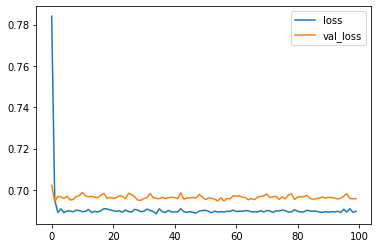

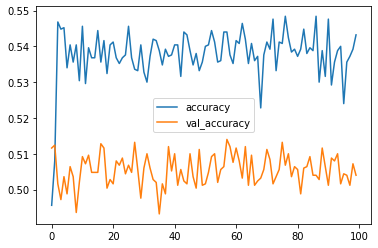

In [13]:
# plot the loss and accuracy

# loss
plt.plot(r_linear_model.history['loss'], label = 'loss')
plt.plot(r_linear_model.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
# accuracy

plt.plot(r_linear_model.history['accuracy'], label = 'accuracy')
plt.plot(r_linear_model.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [0]:
# Now let's try RNN
processed_X = np.expand_dims(X, -1) # Make it NxTxD


# SimpleRNN
simplernn = Sequential([
  Input(shape = (T,D)),
  SimpleRNN(10),
  Dense(1, activation = 'sigmoid')
])

# LSTM
lstm = Sequential([
  Input(shape = (T,D)),
  LSTM(10),
  Dense(1, activation = 'sigmoid')
])

# GRU
gru = Sequential([
  Input(shape = (T,D)),
  GRU(10),
  Dense(1, activation = 'sigmoid')
])

simplernn.compile(loss = 'binary_crossentropy',
                  optimizer = Adam(lr=.01),
                  metrics = ['accuracy'])
lstm.compile(loss = 'binary_crossentropy',
                  optimizer = Adam(lr=.01),
                  metrics = ['accuracy'])
gru.compile(loss = 'binary_crossentropy',
                  optimizer = Adam(lr=.01),
                  metrics = ['accuracy'])

r_simplernn = simplernn.fit(processed_X,Y, epochs = 200, validation_split = .5 )
r_lstm = lstm.fit(processed_X,Y, epochs = 200, validation_split = .5 )
r_gru = gru.fit(processed_X,Y, epochs = 200, validation_split = .5 )

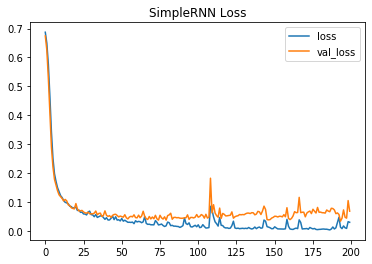

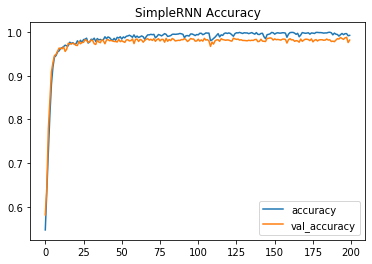

In [25]:
# plot the loss and accuracy

# loss
plt.plot(r_simplernn.history['loss'], label = 'loss')
plt.plot(r_simplernn.history['val_loss'], label = 'val_loss')
plt.title('SimpleRNN Loss')
plt.legend()
plt.show()
# accuracy

plt.plot(r_simplernn.history['accuracy'], label = 'accuracy')
plt.plot(r_simplernn.history['val_accuracy'], label = 'val_accuracy')
plt.title('SimpleRNN Accuracy')
plt.legend()
plt.show()
  

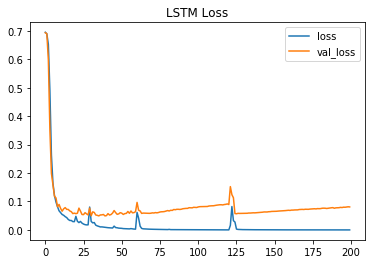

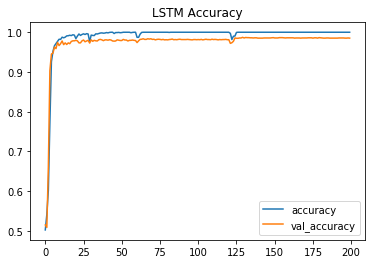

In [26]:

# loss
plt.plot(r_lstm.history['loss'], label = 'loss')
plt.plot(r_lstm.history['val_loss'], label = 'val_loss')
plt.title('LSTM Loss')
plt.legend()
plt.show()
# accuracy

plt.plot(r_lstm.history['accuracy'], label = 'accuracy')
plt.plot(r_lstm.history['val_accuracy'], label = 'val_accuracy')
plt.title('LSTM Accuracy')
plt.legend()
plt.show()


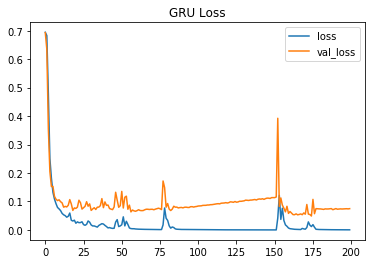

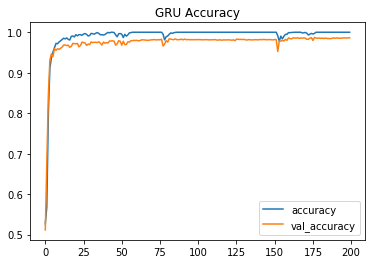

In [27]:

# loss
plt.plot(r_gru.history['loss'], label = 'loss')
plt.plot(r_gru.history['val_loss'], label = 'val_loss')
plt.title('GRU Loss')
plt.legend()
plt.show()
# accuracy

plt.plot(r_gru.history['accuracy'], label = 'accuracy')
plt.plot(r_gru.history['val_accuracy'], label = 'val_accuracy')
plt.title('GRU Accuracy')
plt.legend()
plt.show()



In [0]:
# Now change to the long distance problem
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 1, 2, 3) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [0]:
# Lets try every model again
processed_X = np.expand_dims(X, -1) # Make it NxTxD


# SimpleRNN
simplernn = Sequential([
  Input(shape = (T,D)),
  SimpleRNN(10),
  Dense(1, activation = 'sigmoid')
])

# LSTM
lstm = Sequential([
  Input(shape = (T,D)),
  LSTM(10),
  Dense(1, activation = 'sigmoid')
])

# GRU
gru = Sequential([
  Input(shape = (T,D)),
  GRU(10),
  Dense(1, activation = 'sigmoid')
])

simplernn.compile(loss = 'binary_crossentropy',
                  optimizer = Adam(lr=.01),
                  metrics = ['accuracy'])
lstm.compile(loss = 'binary_crossentropy',
                  optimizer = Adam(lr=.01),
                  metrics = ['accuracy'])
gru.compile(loss = 'binary_crossentropy',
                  optimizer = Adam(lr=.01),
                  metrics = ['accuracy'])

r_simplernn = simplernn.fit(processed_X,Y, epochs = 200, validation_split = .5 )
r_lstm = lstm.fit(processed_X,Y, epochs = 200, validation_split = .5 )
r_gru = gru.fit(processed_X,Y, epochs = 200, validation_split = .5 )

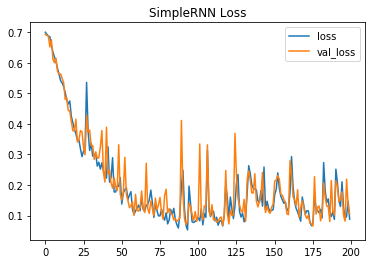

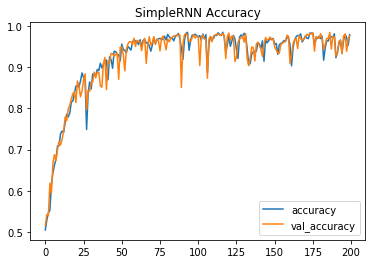

In [31]:
# plot the loss and accuracy

# loss
plt.plot(r_simplernn.history['loss'], label = 'loss')
plt.plot(r_simplernn.history['val_loss'], label = 'val_loss')
plt.title('SimpleRNN Loss')
plt.legend()
plt.show()
# accuracy

plt.plot(r_simplernn.history['accuracy'], label = 'accuracy')
plt.plot(r_simplernn.history['val_accuracy'], label = 'val_accuracy')
plt.title('SimpleRNN Accuracy')
plt.legend()
plt.show()
  

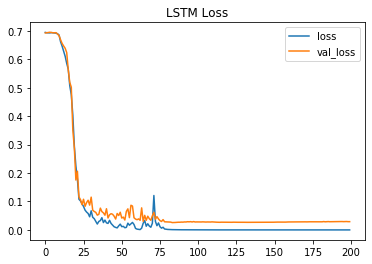

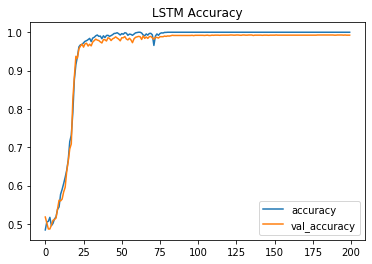

In [32]:

# loss
plt.plot(r_lstm.history['loss'], label = 'loss')
plt.plot(r_lstm.history['val_loss'], label = 'val_loss')
plt.title('LSTM Loss')
plt.legend()
plt.show()
# accuracy

plt.plot(r_lstm.history['accuracy'], label = 'accuracy')
plt.plot(r_lstm.history['val_accuracy'], label = 'val_accuracy')
plt.title('LSTM Accuracy')
plt.legend()
plt.show()


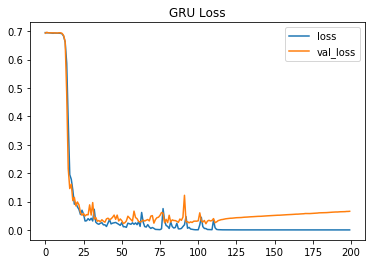

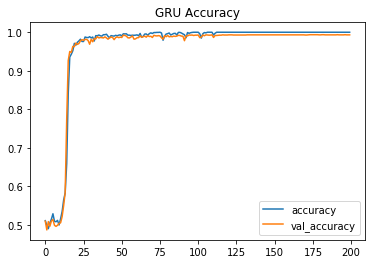

In [33]:

# loss
plt.plot(r_gru.history['loss'], label = 'loss')
plt.plot(r_gru.history['val_loss'], label = 'val_loss')
plt.title('GRU Loss')
plt.legend()
plt.show()
# accuracy

plt.plot(r_gru.history['accuracy'], label = 'accuracy')
plt.plot(r_gru.history['val_accuracy'], label = 'val_accuracy')
plt.title('GRU Accuracy')
plt.legend()
plt.show()



In [0]:
# Now let's try with harder dataset
# To make the data difficult, I'll extend sequence length T to 20
# (T = 20)
X, Y, N = get_data(T = 20, data_type = 'long')
processed_X = np.expand_dims(X, -1) # make it NxTxD

In [41]:
# Test all the models again

# SimpleRNN
simplernn = Sequential([
  Input(shape = (20,D)), # Now T = 20
  SimpleRNN(10),
  Dense(1, activation = 'sigmoid')
])

# LSTM
lstm = Sequential([
  Input(shape = (20,D)),
  LSTM(10),
  Dense(1, activation = 'sigmoid')
])

# GRU
gru = Sequential([
  Input(shape = (20,D)),
  GRU(10),
  Dense(1, activation = 'sigmoid')
])

simplernn.compile(loss = 'binary_crossentropy',
                  optimizer = Adam(lr=.01),
                  metrics = ['accuracy'])
lstm.compile(loss = 'binary_crossentropy',
                  optimizer = Adam(lr=.01),
                  metrics = ['accuracy'])
gru.compile(loss = 'binary_crossentropy',
                  optimizer = Adam(lr=.01),
                  metrics = ['accuracy'])

r_simplernn = simplernn.fit(processed_X,Y, epochs = 200, validation_split = .5 )
r_lstm = lstm.fit(processed_X,Y, epochs = 200, validation_split = .5 )
r_gru = gru.fit(processed_X,Y, epochs = 200, validation_split = .5 )

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 1s 553us/sample - loss: 0.6990 - accuracy: 0.5056 - val_loss: 0.6978 - val_accuracy: 0.4968
Epoch 2/200
2500/2500 [==============================] - 1s 221us/sample - loss: 0.6958 - accuracy: 0.5036 - val_loss: 0.6966 - val_accuracy: 0.5060
Epoch 3/200
2500/2500 [==============================] - 1s 209us/sample - loss: 0.6934 - accuracy: 0.5156 - val_loss: 0.6943 - val_accuracy: 0.5076
Epoch 4/200
2500/2500 [==============================] - 1s 214us/sample - loss: 0.6954 - accuracy: 0.5144 - val_loss: 0.6954 - val_accuracy: 0.5116
Epoch 5/200
2500/2500 [==============================] - 1s 222us/sample - loss: 0.6934 - accuracy: 0.5316 - val_loss: 0.6952 - val_accuracy: 0.5148
Epoch 6/200
2500/2500 [==============================] - 1s 213us/sample - loss: 0.6947 - accuracy: 0.5116 - val_loss: 0.7001 - val_accuracy: 0.5004
Epoch 7/200
2500/2500 [==============================] - 1

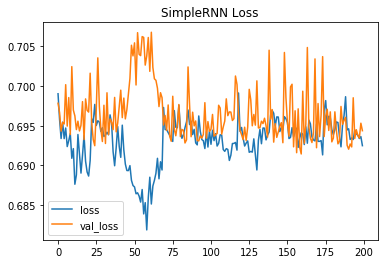

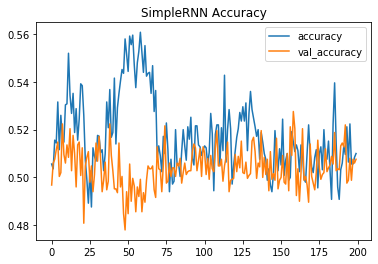

In [42]:
# plot the loss and accuracy

# loss
plt.plot(r_simplernn.history['loss'], label = 'loss')
plt.plot(r_simplernn.history['val_loss'], label = 'val_loss')
plt.title('SimpleRNN Loss')
plt.legend()
plt.show()
# accuracy

plt.plot(r_simplernn.history['accuracy'], label = 'accuracy')
plt.plot(r_simplernn.history['val_accuracy'], label = 'val_accuracy')
plt.title('SimpleRNN Accuracy')
plt.legend()
plt.show()
  

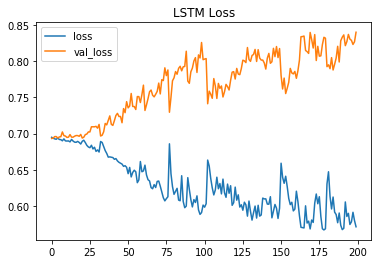

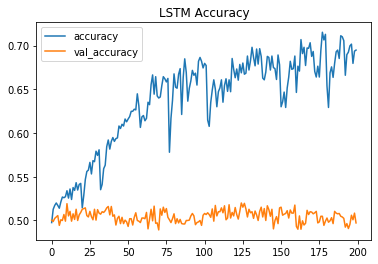

In [43]:

# loss
plt.plot(r_lstm.history['loss'], label = 'loss')
plt.plot(r_lstm.history['val_loss'], label = 'val_loss')
plt.title('LSTM Loss')
plt.legend()
plt.show()
# accuracy

plt.plot(r_lstm.history['accuracy'], label = 'accuracy')
plt.plot(r_lstm.history['val_accuracy'], label = 'val_accuracy')
plt.title('LSTM Accuracy')
plt.legend()
plt.show()


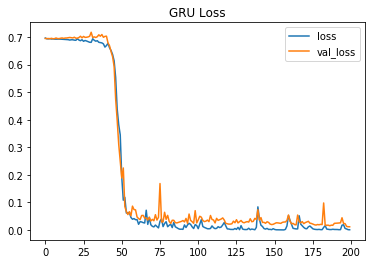

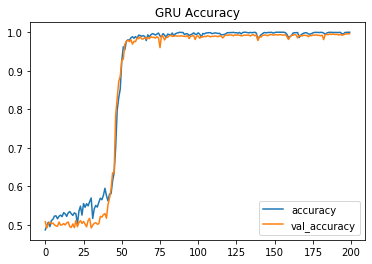

In [44]:

# loss
plt.plot(r_gru.history['loss'], label = 'loss')
plt.plot(r_gru.history['val_loss'], label = 'val_loss')
plt.title('GRU Loss')
plt.legend()
plt.show()
# accuracy

plt.plot(r_gru.history['accuracy'], label = 'accuracy')
plt.plot(r_gru.history['val_accuracy'], label = 'val_accuracy')
plt.title('GRU Accuracy')
plt.legend()
plt.show()



In [48]:
# Now try LSTM with global max pooling
lstm_gmp2d = Sequential([
  Input(shape = (20,D)),
  LSTM(5, return_sequences=True),
  GlobalMaxPooling1D(),
  Dense(1, activation = 'sigmoid')
])
lstm_gmp2d.compile(optimizer = Adam(lr=0.01),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
# Train the RNN
r = lstm_gmp2d.fit(processed_X, Y, validation_split = .5, epochs = 150)

Train on 2500 samples, validate on 2500 samples
Epoch 1/150
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6944 - accuracy: 0.4992 - val_loss: 0.6940 - val_accuracy: 0.4968
Epoch 2/150
2500/2500 [==============================] - 1s 378us/sample - loss: 0.6935 - accuracy: 0.5128 - val_loss: 0.6950 - val_accuracy: 0.5008
Epoch 3/150
2500/2500 [==============================] - 1s 371us/sample - loss: 0.6934 - accuracy: 0.5076 - val_loss: 0.6946 - val_accuracy: 0.4956
Epoch 4/150
2500/2500 [==============================] - 1s 370us/sample - loss: 0.6932 - accuracy: 0.5124 - val_loss: 0.6952 - val_accuracy: 0.4876
Epoch 5/150
2500/2500 [==============================] - 1s 373us/sample - loss: 0.6924 - accuracy: 0.5224 - val_loss: 0.6957 - val_accuracy: 0.4860
Epoch 6/150
2500/2500 [==============================] - 1s 370us/sample - loss: 0.6914 - accuracy: 0.5192 - val_loss: 0.6959 - val_accuracy: 0.4972
Epoch 7/150
2500/2500 [==============================] - 1s 

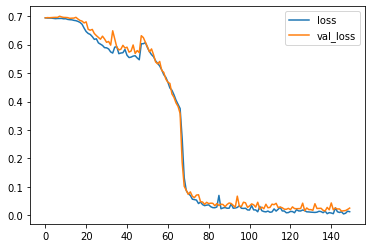

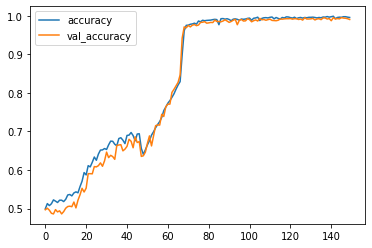

In [49]:
# plot the loss and the accuracy
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
# accuracy
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [0]:
# In the end, we can say that LSTM and GRU does a better job
# on long sequences and long distances
# also I used max pooling on LSTM in the last example
# Remember that LSTM outputs last h(t)s,
# If we get every h(t) sequences, we may select only the maximum
# efficient ones. By using max pooling, we select maximum efficient
# h(t) from the sequence. So in the end we pass the best h(t)s we have
# to the Dense layer.
# LSTM with Max Pooling gives the almost same result as others with 
# less epochs, so this approach is more powerful than previous ones